<a href="https://colab.research.google.com/github/Bichitrananda/Performance-evaluation-of-Machine-learning-algorithms-in-Biomedical-Document-Classification/blob/master/TREC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
ls

 20_cnn_model.json             'Getting started.pdf'
 20n_cnn_model1.json            glove.6B.50d.txt
 20n_cnn_model.json             IMDB_weights.best.hdf5
 20news_weights.best1.hdf5      MISSION/
 20news_weights.best.hdf5       model.json
 BC3_part1.csv                  model.yaml
 BC3_part2.csv                  odia-dataset/
 BENGALI/                       project_1_reuter.ipynb
 bp_mll_keras.py                __pycache__/
 bp_mll.py                      RCNN_BC3-P2.ipynb
 cnn_frs_farm_model.json        Reuter_cnn_model.json
'Colab Notebooks'/              Reuter_weights.best.hdf5
'Copy of farm-ads_tr.csv'       RMDL/
'Copy of FRS_TREC.ipynb'       'ROUGH SET'/
 data1.csv                      SVM-CNN/
 data3.csv                      test.csv
 data4.csv                      test_labels.csv
 data.csv                       TEXT_CODE/
 data_WOS5736.csv               text_feature_extraction.py
'DEEP LEARING'/                 train.csv
 diabetes.csv                   trec.csv
 diabetes.ip

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas as pd
#Data description
df2=pd.read_csv('trec.csv')
df2.head()
#sentences=df2['Abstract']
#labels=df2['Label']
#split the data into train and test dataset
#print(len(sentences))


,Data,Label
0,b'A visual scene is rapidly segmented into the...,1
1,b'IL-4 plays a major role in IgE production. I...,4
2,b'BackgroundAlthough vital statistics have ind...,3
3,b'Galectins are a continuously expanding famil...,2
4,b'We show by nanoelectrospray ionization (nano...,2


In [0]:
df2.groupby('Label').size()

Label
0    202
1    201
2    198
3    205
4    261
dtype: int64

In [0]:
train_data=df2['Data']
Y=df2['Label']
print(len(train_data))
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(train_data.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(bbc_counts)
print(X.shape)

1067
(1067, 9676)


In [0]:
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=10, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.895080 (0.031924)
DT: 0.854752 (0.020885)
MNB: 0.963481 (0.019782)
BNB: 0.958826 (0.017764)
RF: 0.952222 (0.014741)
SVM: 0.970041 (0.015499)
PPN: 0.955960 (0.018306)
SGD: 0.962564 (0.015586)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Ridge: 0.976591 (0.015217)
RC: 0.950370 (0.021312)
PA: 0.972844 (0.012127)
BPN: 0.971910 (0.011059)


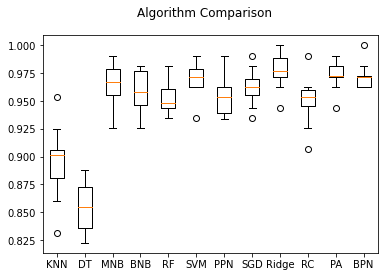

In [0]:
#Comparision of Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import svm
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', tree.DecisionTreeClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('MNB', MultinomialNB(alpha=.01)))
models.append(('BNB', BernoulliNB(alpha=.01)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', svm.SVC()))
models.append(('PPN', Perceptron(max_iter=50, tol=1e-3)))
models.append(('SGD', SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")))
models.append(('Ridge', RidgeClassifier(tol=1e-2, solver="sag")))
models.append(('RC', NearestCentroid()))
models.append(('PA', PassiveAggressiveClassifier(max_iter=50, tol=1e-3)))
models.append(('BPN', MLPClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
#.......Evaluationg Accuracy, precision, recall, f1-score for all algo....#

In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10) # Define the split - into 2 folds 
skf.get_n_splits(X,Y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
#.................SVM................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = svm.SVC()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  #score1=precision_score(y_test, y_pred, average='weighted')
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  #score2=recall_score(y_test, y_pred, average='weighted')
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  #score3=f1_score(y_test, y_pred, average='weighted')  
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)
  a = np.array(acc)

print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9700405572209487 0.015499039156272536
Precision: 0.9713934011699308 0.014875957580320056
Recall: 0.9700405572209487 0.015499039156272536
F1-score: 0.9698930020659281 0.01563484395453125


In [0]:
#.................KNN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = KNeighborsClassifier(n_neighbors=10)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.895080232763181 0.03192388062057183
Precision: 0.9097680815401196 0.027039886282562993
Recall: 0.895080232763181 0.03192388062057183
F1-score: 0.8951896462910648 0.03167195715423645


In [0]:
#.................DT................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import tree
model = tree.DecisionTreeClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8510315640980426 0.02674985327488548
Precision: 0.8574319445766392 0.025861949239985926
Recall: 0.8510315640980426 0.02674985327488548
F1-score: 0.8512055545370414 0.026790815334843194


In [0]:
#.................RF................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9465702697936871 0.018819617559120098
Precision: 0.950861477201595 0.017626813220316104
Recall: 0.9465702697936871 0.018819617559120098
F1-score: 0.9461307030317497 0.01924743267552916


In [0]:
#.................MNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MultinomialNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9634808675718567 0.019782119867360913
Precision: 0.9647745592489585 0.019310239357929714
Recall: 0.9634808675718567 0.019782119867360913
F1-score: 0.9630278051894432 0.02047119356694145


In [0]:
#.................BNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9588256039499207 0.017764152396005848
Precision: 0.9613290974027613 0.015767565241759072
Recall: 0.9588256039499207 0.017764152396005848
F1-score: 0.9584248028926863 0.018476460198234897


In [0]:
#.................PPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = Perceptron(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9559601481220245 0.01830617482161013
Precision: 0.9588428096632388 0.01703272986699262
Recall: 0.9559601481220245 0.01830617482161013
F1-score: 0.9558610413737642 0.018304376332213892


In [0]:
#.................SGD................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model =SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9634985011461824 0.01930888466396839
Precision: 0.9647893072094327 0.018855091296086486
Recall: 0.9634985011461824 0.01930888466396839
F1-score: 0.9634828655521638 0.019180452160739967


In [0]:
#.................Ridge................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = RidgeClassifier(tol=1e-2, solver="sag")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Accuracy: 0.9765914300828777 0.015216827038666558
Precision: 0.9777530250954154 0.014617985952551685
Recall: 0.9765914300828777 0.015216827038666558
F1-score: 0.9765215600747121 0.015268057726442798


In [0]:
#.................RC................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = NearestCentroid()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9503703050608359 0.021312436102380282
Precision: 0.9526095035089316 0.02018290006246973
Recall: 0.9503703050608359 0.021312436102380282
F1-score: 0.9502183191368332 0.02149697938751909


In [0]:
#.................PA................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = PassiveAggressiveClassifier(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9756656674307884 0.013961682440212966
Precision: 0.9770300266824286 0.013415980002369312
Recall: 0.9756656674307884 0.013961682440212966
F1-score: 0.9755992156283047 0.014018049943751285


In [0]:
#.................BPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MLPClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9700317404337859 0.011691900866397457
Precision: 0.9712611114840424 0.011117502345161658
Recall: 0.9700317404337859 0.011691900866397457
F1-score: 0.969949326128221 0.011718755576807991


In [0]:
#.......................END..........................